<a href="https://colab.research.google.com/github/veljkoselakovic/Spam-URL-detection/blob/main/Notebooks/LSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import pandas as pd

df = pd.read_csv(r'url_spam_classification_features.csv');
df.reset_index();

df_1 = df.iloc[:70000,:]
test = df.iloc[70001:,:]

df = df_1


In [169]:

inp = df.drop(['url', 'is_spam'], axis=1)
inp.head(120)


,urlLength,hostnameLength,secureProtocol,com,ru,org,net,in,au,uk,ca,edu,gov,xyz,cn,ml,info,club,co,us,digitNumber,buy,direct,order,status,shop,dirt,friends,single,meet,score,income,boss,business,earn,cash,make,money,biz,price,free,weight,million,giveaway,claim,offer,win,sign,invest,natural,call,apply,now,bonus,legal,subscribe,nonsense,google,facebook,dropbox,twitter
0,51,27,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000000,0,0,0,0
1,22,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0
2,34,11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0
3,48,11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0
4,27,11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,92,11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0
116,116,14,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0
117,106,6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0
118,63,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.571429,0,0,0,0


In [170]:
out = df['is_spam'].astype(int)
out.head(210)


0      1
1      1
2      1
3      0
4      1
      ..
205    0
206    0
207    0
208    0
209    0
Name: is_spam, Length: 210, dtype: int64

In [171]:
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm

!pip install cache-magic
import cache_magic

# %cache -r

regr = svm.SVC(class_weight='balanced')
%cache regr = regr.fit(inp, out)


Resetting entire cache
Creating new value for variable 'regr'


In [172]:
test_inp = test.drop(['url', 'is_spam'], axis=1)
test_out = test['is_spam'].astype(int)

outD = pd.DataFrame(regr.predict(test_inp))
test_out.reset_index(drop=True, inplace=True)
outD.reset_index(drop=True, inplace=True)

outD.head(120)
out_final = pd.concat([test_out, outD], axis=1, ignore_index = True)


rslt_df = out_final[out_final[0] == 1]
print(rslt_df)
# for index, row in rslt_df.iterrows():
#   print(test.iloc[index])
#   print("-------")
#   print(outD.iloc[index][0])



       0  1
18     1  1
125    1  0
297    1  1
364    1  0
435    1  1
...   .. ..
16847  1  1
16968  1  0
17117  1  1
17327  1  1
17328  1  1

[192 rows x 2 columns]


In [173]:
## CUSTOM TEST 
# http://n8ckdic711b1rp.w3ae2-2295.speceoff.us/?c1=cvBQBAATGAAA4RE0W7vLlxQ&c41=ud7812290
arr = np.array([86, 34, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])
arr = arr.reshape(1,-1)
print(arr.shape)
x = regr.predict(arr)
print(x)

(1, 61)
[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [174]:
import pandas as pd
# outD = outD * 10
# outD = outD.round()


df_confusion = pd.crosstab(test_out, outD[0])
print(df_confusion)


0            0     1
is_spam             
0        12544  4844
1           53   139


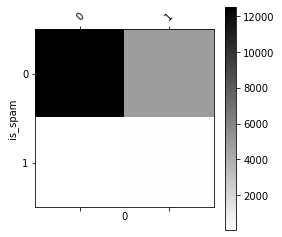

In [175]:
import matplotlib.pyplot as plt
import numpy as np
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

